In [50]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data = pd.read_csv('JDT.csv')

In [52]:
data.shape

(997, 62)

In [53]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        
        def convert_to_int(val):
            return text_digit_values[val]
        
        if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
            column_elements = df[column].values.tolist()
            unique_elements = set(column_elements)
            
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

data = handle_non_numeric_data(data)
print(data.head())


   ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             0   0.000934    0.000000   
1                             0   0.000741    0.000000   
2                             0   0.000000    0.000000   
3                             0   0.001529    0.015913   
4                             0   0.000000    0.000000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  4                           0.00   
1                                  3                           0.00   
2                                  4                           0.00   
3                                 35                           0.00   
4                                  2                           1.01   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     0.00     0.004517                     0.00000   
1                     0.00     0.014817                     0.00091   
2          

In [54]:
array = data.values

In [71]:
Z = array[:,0:61]
Y = array[:,61]

# Decision Tree 

In [73]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

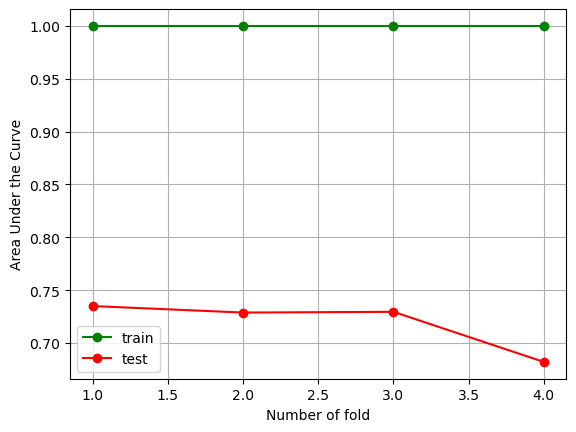

In [75]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

# Applying Hyper Parameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
max_features = ['auto', 'sqrt','log2']
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [77]:
dt_randomcv=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=6, min_samples_split=14, splitter=random; tot

[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=450, max_featur

[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=2, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=2, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=2, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=560

[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [78]:
dt_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'entropy'}

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Decision Tree Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm in training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       551
         1.0       1.00      1.00      1.00       146

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697

[[551   0]
 [  0 146]]
ACC:  1.0
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       240
         1.0       0.51      0.53      0.52        60

    accuracy                           0.80       300
   macro avg       0.69      0.70      0.70       300
weighted avg       0.81      0.80      0.81       300

[[209  31]
 [ 28  32]]
ACC:  0.8033333333333333


In [80]:
best_random_grid = dt_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[228  12]
 [ 28  32]]
Accuracy Score 0.8666666666666667
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       240
         1.0       0.73      0.53      0.62        60

    accuracy                           0.87       300
   macro avg       0.81      0.74      0.77       300
weighted avg       0.86      0.87      0.86       300



In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'splitter': [dt_randomcv.best_params_['splitter']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'], 
                         dt_randomcv.best_params_['min_samples_leaf']+2, 
                         dt_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 2,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'], 
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 2]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [890], 'splitter': ['random'], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [8, 9, 10, 11, 12]}


In [82]:
dt = tree.DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, 

[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=ent

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [890],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'splitter': ['random']},
             verbose=2)

In [83]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       splitter='random')

In [84]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       splitter='random')

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[534  17]
 [ 82  64]]
Auc Score 0.8489048554309723
Accuracy Score 0.8579626972740315
Classification report:               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       551
         1.0       0.79      0.44      0.56       146

    accuracy                           0.86       697
   macro avg       0.83      0.70      0.74       697
weighted avg       0.85      0.86      0.84       697

Decision Tree Testing Result
[[234   6]
 [ 41  19]]
Auc Score 0.7378125
Accuracy Score 0.8433333333333334
Classification report:               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       240
         1.0       0.76      0.32      0.45        60

    accuracy                           0.84       300
   macro avg       0.81      0.65      0.68       300
weighted avg       0.83      0.84      0.82       300



# After Hyper Parameter Tuning

In [86]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

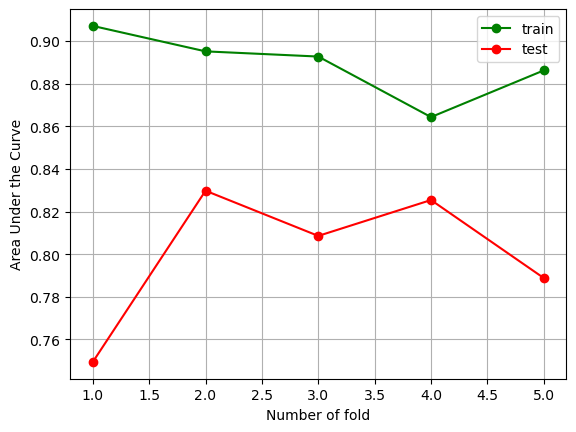

In [87]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

# Logistic Regressionn

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1500)

In [90]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = LogisticRegression(solver='lbfgs', max_iter=1500)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

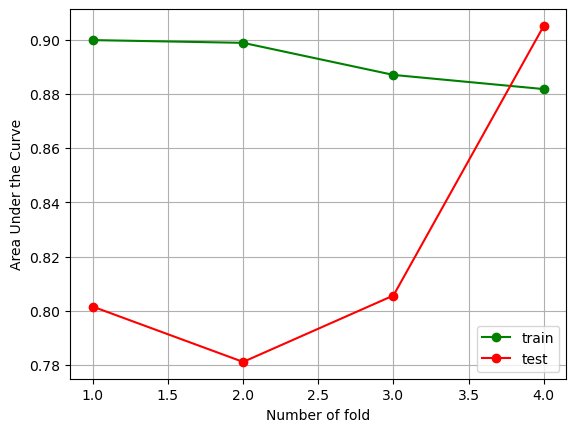

In [91]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       551
         1.0       0.83      0.55      0.66       146

    accuracy                           0.88       697
   macro avg       0.86      0.76      0.80       697
weighted avg       0.88      0.88      0.87       697

[[534  17]
 [ 65  81]]
ACC:  0.8823529411764706
AUC:  0.8763642691992144
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       240
         1.0       0.72      0.43      0.54        60

    accuracy                           0.85       300
   macro avg       0.80      0.70      0.73       300
weighted avg       0.84      0.85      0.84       300

[[230  10]
 [ 34  26]]
ACC:  0.8533333333333334
AUC:  0.8546527777777776


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1500)

In [94]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
# class_weight = ['balanced','None']
max_iter = [int(x) for x in np.linspace(1000, 3000, 10)]
multi_class = ['auto', 'ovr', 'multinomial'] 

random_grid = {
    'penalty': penalty,
    'solver' : solver,
    'C':C,
    'fit_intercept':fit_intercept,
#     'class_weight':class_weight,
    'max_iter':max_iter,
    'multi_class':multi_class
}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001], 'fit_intercept': [True, False], 'max_iter': [1000, 1222, 1444, 1666, 1888, 2111, 2333, 2555, 2777, 3000], 'multi_class': ['auto', 'ovr', 'multinomial']}


In [95]:
lr = LogisticRegression()
lr_randomcv=RandomizedSearchCV(estimator=lr,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.7s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2111, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2111, multi_cla

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=auto, pena

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.7s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2777, mul

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.01, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=0.01, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.001, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time=  48.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.6min


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time=  45.1s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   1.5s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   1.9s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END C=0.001, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, ma

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=  29.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=  37.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=  28.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=   1.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=   1.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=   1.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   1.3s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   2.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   2.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   2.3s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=  46.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=  51.1s


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=  39.3s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=elasticnet, solver=sag; 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, ma

C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.2min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time= 2.0min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time=  57.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Trace

[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.3s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [1000, 100, 10, 1.0, 0.1, 0.01,
                                              0.001],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 1222, 1444, 1666,
                                                     1888, 2111, 2333, 2555,
                                                     2777, 3000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   ra

In [96]:
lr_randomcv.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 1222,
 'fit_intercept': True,
 'C': 0.1}

In [97]:
best_random_grid = lr_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[230  10]
 [ 33  27]]
Accuracy Score 0.8566666666666667
Classification report:               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       240
         1.0       0.73      0.45      0.56        60

    accuracy                           0.86       300
   macro avg       0.80      0.70      0.74       300
weighted avg       0.85      0.86      0.84       300



In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver':[lr_randomcv.best_params_['solver']],
    'penalty':[lr_randomcv.best_params_['penalty']],
    'multi_class':[lr_randomcv.best_params_['multi_class']],
    'max_iter':[
        lr_randomcv.best_params_['max_iter']-100,
        lr_randomcv.best_params_['max_iter']-50,
        lr_randomcv.best_params_['max_iter'],
        lr_randomcv.best_params_['max_iter']+100,
        lr_randomcv.best_params_['max_iter']+50,
        lr_randomcv.best_params_['max_iter']+120
    ],
    'fit_intercept':[lr_randomcv.best_params_['fit_intercept']],
    'C':[
        lr_randomcv.best_params_['C']-0.0009,
        lr_randomcv.best_params_['C']-0.0005,
        lr_randomcv.best_params_['C']+0.005,
        lr_randomcv.best_params_['C']+0.0009
    ]
}

print(param_grid)

{'solver': ['lbfgs'], 'penalty': ['l2'], 'multi_class': ['ovr'], 'max_iter': [1122, 1172, 1222, 1322, 1272, 1342], 'fit_intercept': [True], 'C': [0.09910000000000001, 0.0995, 0.10500000000000001, 0.1009]}


In [99]:
lr = LogisticRegression()
grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0995, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1122, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1172, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1322, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1272, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1009, fit_intercept=True, max_iter=1342, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.09910000000000001, 0.0995, 0.10500000000000001,
                               0.1009],
                         'fit_intercept': [True],
                         'max_iter': [1122, 1172, 1222, 1322, 1272, 1342],
                         'multi_class': ['ovr'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             verbose=2)

In [100]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(C=0.0995, max_iter=1272, multi_class='ovr')

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[534  17]
 [ 67  79]]
Auc Score 0.871553588742759
Accuracy Score 0.8794835007173601
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       551
         1.0       0.82      0.54      0.65       146

    accuracy                           0.88       697
   macro avg       0.86      0.76      0.79       697
weighted avg       0.87      0.88      0.87       697

Decision Tree Testing Result
[[230  10]
 [ 34  26]]
Auc Score 0.8662500000000001
Accuracy Score 0.8533333333333334
Classification report:               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       240
         1.0       0.72      0.43      0.54        60

    accuracy                           0.85       300
   macro avg       0.80      0.70      0.73       300
weighted avg       0.84      0.85      0.84       300



In [102]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

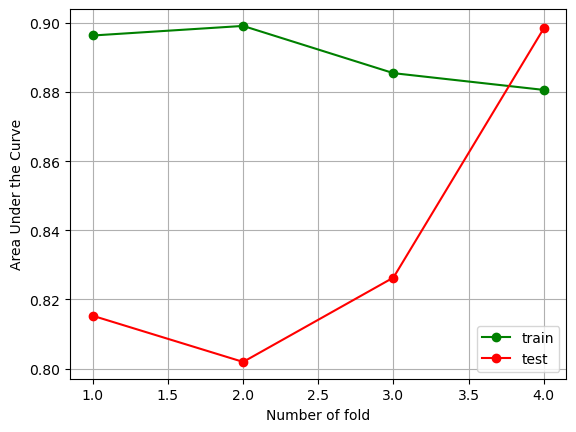

In [103]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

# KNN 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [104]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = KNeighborsClassifier( n_neighbors=2)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

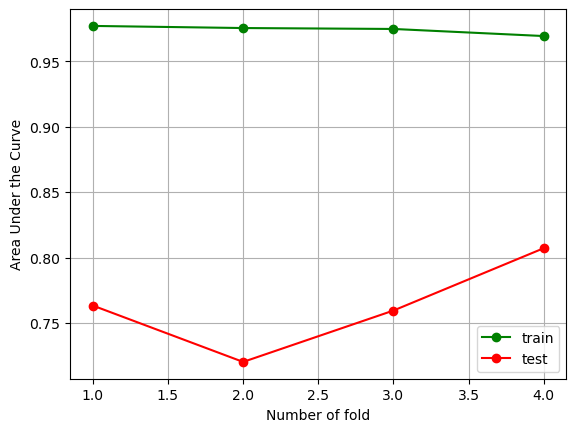

In [105]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       551
         1.0       1.00      0.48      0.65       146

    accuracy                           0.89       697
   macro avg       0.94      0.74      0.79       697
weighted avg       0.90      0.89      0.88       697

[[551   0]
 [ 76  70]]
ACC:  0.890961262553802
AUC:  0.9744922059518186
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       240
         1.0       0.71      0.40      0.51        60

    accuracy                           0.85       300
   macro avg       0.79      0.68      0.71       300
weighted avg       0.83      0.85      0.83       300

[[230  10]
 [ 36  24]]
ACC:  0.8466666666666667
AUC:  0.7879166666666667


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [108]:
n_neighbors = [5,7,9,11,13,15]
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
random_grid = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'metric' : metric
}
print(random_grid)

{'n_neighbors': [5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}


In [110]:
from sklearn.model_selection import RandomizedSearchCV
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
knn_randomcv.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it 

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, wei

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean,

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan,

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan,

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   random_state=555, verbose=2)

In [111]:
knn_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [112]:
best_random_grid = knn_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[228  12]
 [ 28  32]]
Accuracy Score 0.8666666666666667
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       240
         1.0       0.73      0.53      0.62        60

    accuracy                           0.87       300
   macro avg       0.81      0.74      0.77       300
weighted avg       0.86      0.87      0.86       300



In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'weights' : [knn_randomcv.best_params_['weights']],
    'metric' : [knn_randomcv.best_params_['metric']],
    'n_neighbors' : [
        knn_randomcv.best_params_['n_neighbors']-2,
        knn_randomcv.best_params_['n_neighbors']-1,
        knn_randomcv.best_params_['n_neighbors'],
        knn_randomcv.best_params_['n_neighbors']+2,
        knn_randomcv.best_params_['n_neighbors']+1,
    ]
}

print(param_grid)

{'weights': ['distance'], 'metric': ['manhattan'], 'n_neighbors': [3, 4, 5, 7, 6]}


In [116]:
knn = KNeighborsClassifier()
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=4, weig

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [3, 4, 5, 7, 6],
                         'weights': ['distance']},
             verbose=2)

In [117]:
best_grid = grid_search.best_estimator_
best_grid

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("KNN Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("KNN Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

KNN Training Result
[[551   0]
 [  0 146]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       551
         1.0       1.00      1.00      1.00       146

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697

KNN Testing Result
[[222  18]
 [ 27  33]]
Auc Score 0.8046527777777778
Accuracy Score 0.85
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       240
         1.0       0.65      0.55      0.59        60

    accuracy                           0.85       300
   macro avg       0.77      0.74      0.75       300
weighted avg       0.84      0.85      0.85       300



In [119]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

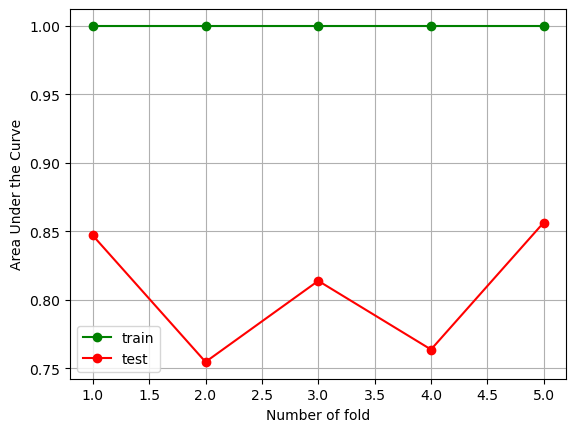

In [120]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

# Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       551
         1.0       0.67      0.48      0.56       146

    accuracy                           0.84       697
   macro avg       0.77      0.71      0.73       697
weighted avg       0.83      0.84      0.83       697

[[517  34]
 [ 76  70]]
ACC:  0.8421807747489239
AUC:  0.8163861472291971
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       240
         1.0       0.74      0.42      0.53        60

    accuracy                           0.85       300
   macro avg       0.80      0.69      0.72       300
weighted avg       0.84      0.85      0.84       300

[[231   9]
 [ 35  25]]
ACC:  0.8533333333333334
AUC:  0.8168055555555556


In [123]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

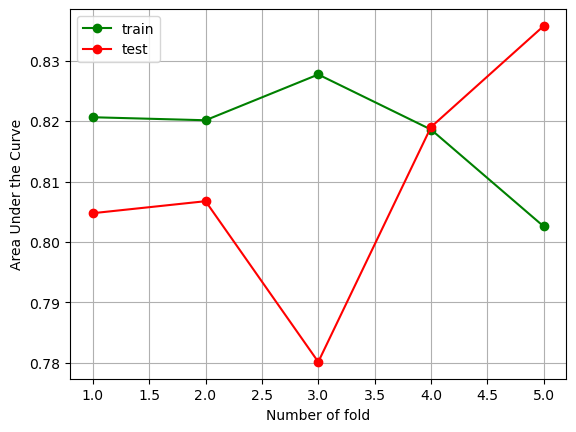

In [124]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [125]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [126]:
random_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
print(random_grid)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

In [127]:
from sklearn.model_selection import RandomizedSearchCV
nb_randomcv=RandomizedSearchCV(estimator=nb,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
nb_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.5

[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-07; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-07; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var

RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=555, verbose=2)

In [128]:
nb_randomcv.best_params_

{'var_smoothing': 8.111308307896873e-08}

In [129]:
best_random_grid = nb_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[147  10]
 [ 17  25]]
Accuracy Score 0.864321608040201
Classification report:               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       157
         1.0       0.71      0.60      0.65        42

    accuracy                           0.86       199
   macro avg       0.81      0.77      0.78       199
weighted avg       0.86      0.86      0.86       199



In [130]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb = GaussianNB()
grid_search=GridSearchCV(estimator=nb,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.

[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01873817422860384; total time=   0.0s
[CV] END ..................var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END ..................var_smoothing=0.01519911082952933; total time=   0.0s
[CV] END ..................v

[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var

[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var

[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083061e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)

In [131]:
best_grid = grid_search.best_estimator_
print(best_grid)
grid_search.best_params_

GaussianNB(var_smoothing=6.579332246575682e-08)


{'var_smoothing': 6.579332246575682e-08}

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("KNN Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("KNN Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

KNN Training Result
[[601  33]
 [ 97  67]]
Auc Score 0.8117882972993767
Accuracy Score 0.8370927318295739
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       634
         1.0       0.67      0.41      0.51       164

    accuracy                           0.84       798
   macro avg       0.77      0.68      0.70       798
weighted avg       0.82      0.84      0.82       798

KNN Testing Result
[[147  10]
 [ 17  25]]
Auc Score 0.8313618441006976
Accuracy Score 0.864321608040201
Classification report:               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       157
         1.0       0.71      0.60      0.65        42

    accuracy                           0.86       199
   macro avg       0.81      0.77      0.78       199
weighted avg       0.86      0.86      0.86       199



In [133]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

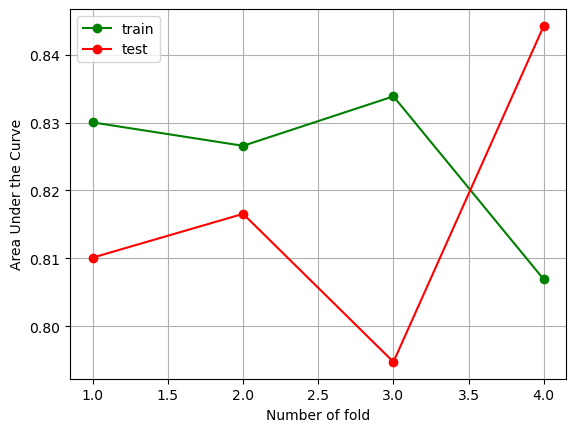

In [134]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

# SVM

In [135]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.01, probability = True)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       551
         1.0       0.82      0.47      0.60       146

    accuracy                           0.87       697
   macro avg       0.85      0.72      0.76       697
weighted avg       0.86      0.87      0.85       697

[[536  15]
 [ 77  69]]
ACC:  0.8680057388809183
AUC:  0.8673209357830095
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       240
         1.0       0.78      0.35      0.48        60

    accuracy                           0.85       300
   macro avg       0.82      0.66      0.70       300
weighted avg       0.84      0.85      0.83       300

[[234   6]
 [ 39  21]]
ACC:  0.85
AUC:  0.8466666666666667


In [138]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = svm.SVC(kernel='linear', C=0.01, probability = True)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

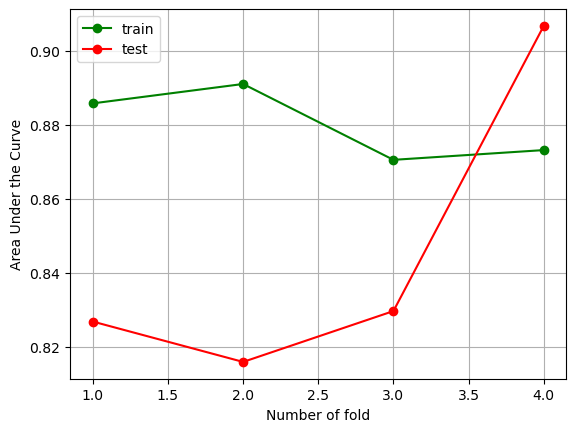

In [139]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [140]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
svc = svm.SVC(probability=True)
grid_search=GridSearchCV(estimator=svc,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [141]:
grid_search.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [142]:
grid_search.best_estimator_

SVC(C=1, gamma=0.0001, probability=True)

In [193]:
from sklearn.metrics import roc_curve, roc_auc_score
best_grid = grid_search.best_estimator_
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("SVM Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("SVM Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

SVM Training Result
[[ 91  65]
 [  2 590]]
Auc Score 0.9215826403326401
Accuracy Score 0.910427807486631
Classification report:               precision    recall  f1-score   support

         0.0       0.98      0.58      0.73       156
         1.0       0.90      1.00      0.95       592

    accuracy                           0.91       748
   macro avg       0.94      0.79      0.84       748
weighted avg       0.92      0.91      0.90       748

SVM Testing Result
[[ 23  27]
 [ 11 188]]
Auc Score 0.7595979899497488
Accuracy Score 0.8473895582329317
Classification report:               precision    recall  f1-score   support

         0.0       0.68      0.46      0.55        50
         1.0       0.87      0.94      0.91       199

    accuracy                           0.85       249
   macro avg       0.78      0.70      0.73       249
weighted avg       0.83      0.85      0.84       249



In [143]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

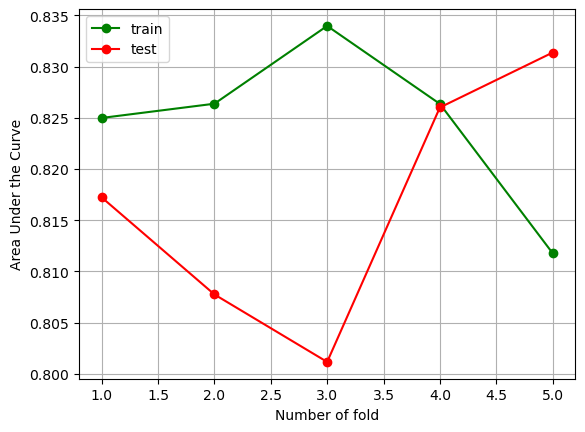

In [144]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()